In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Load the dataset
df = pd.read_csv('BirlesmisVeri.csv')


In [117]:
df

,Il,Ilce,Urun Adi,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim
0,ADANA,SEYHAN,Bugday (Durum) Kuru,300,18.44,24.18,13.37,64.83,60.50,4.92,9.21,100.992,27.0
1,ADANA,SEYHAN,Bugday (Durum) Sulu,500,18.44,24.18,13.37,64.83,60.50,4.92,9.21,100.992,27.0
2,ADANA,SEYHAN,Bugday (Diger) Kuru,300,18.44,24.18,13.37,64.83,60.50,4.92,9.21,100.992,27.0
3,ADANA,SEYHAN,Bugday (Diger) Sulu,500,18.44,24.18,13.37,64.83,60.50,4.92,9.21,100.992,27.0
4,ADANA,YUREGIR,Bugday (Durum) Kuru,324,18.44,24.18,13.37,64.83,60.50,4.92,9.21,100.992,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13484,OSMANIYE,DUZICI,Zeytin (Sofralik),2 940,15.05,20.54,10.05,64.33,68.17,6.33,8.61,96.442,405.0
13485,OSMANIYE,HASANBEYLI,Zeytin (Sofralik),525,15.05,20.37,10.27,64.33,68.17,6.33,8.61,92.255,769.0
13486,OSMANIYE,KADIRLI,Zeytin (Sofralik),,16.80,22.73,11.42,63.67,61.33,5.75,8.97,100.317,82.0
13487,OSMANIYE,MERKEZ,Zeytin (Sofralik),1 519,17.62,22.73,13.07,67.92,69.75,6.25,8.77,99.756,128.0


In [118]:
df['Verim (Kg/Dekar)'] = pd.to_numeric(df['Verim (Kg/Dekar)'], errors='coerce') # Hatalı değerleri NaN yapar
df = df.dropna(subset=['Verim (Kg/Dekar)']) # NaN değerleri siler

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6968\293358024.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Il', y='Verim (Kg/Dekar)', data=top_5_provinces, palette="Blues_d") # seaborn ile barplot çizdik


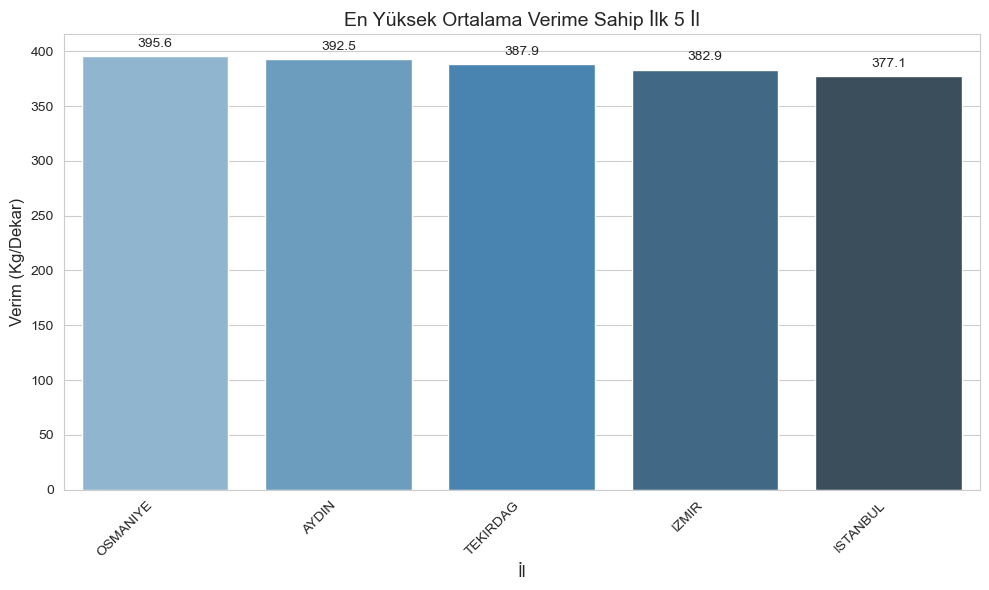


En Yüksek Ortalama Verime Sahip İlk 5 İl (Tablo):
| Il       |   Verim (Kg/Dekar) |
|:---------|-------------------:|
| OSMANIYE |            395.595 |
| AYDIN    |            392.502 |
| TEKIRDAG |            387.912 |
| IZMIR    |            382.923 |
| ISTANBUL |            377.053 |


In [119]:
# SADECE İLLERE GÖRE ORTALAMA VERİM HESAPLAMA
avg_yield_per_province = df.groupby(['Il'])['Verim (Kg/Dekar)'].mean().reset_index()
avg_yield_per_province = avg_yield_per_province.sort_values(by='Verim (Kg/Dekar)', ascending=False)

# En fazla 5 ili seçelim
top_5_provinces = avg_yield_per_province.head(5)

# Daha güzel bir grafik için seaborn kullanalım
plt.figure(figsize=(10, 6)) # Grafik boyutunu ayarladık
sns.set_style("whitegrid") # Arka plan stilini ayarladık
ax = sns.barplot(x='Il', y='Verim (Kg/Dekar)', data=top_5_provinces, palette="Blues_d") # seaborn ile barplot çizdik
plt.ylabel('Verim (Kg/Dekar)', fontsize=12) # Eksen etiket boyutlarını ayarladık
plt.xlabel('İl', fontsize=12)
plt.title('En Yüksek Ortalama Verime Sahip İlk 5 İl', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # X ekseni etiketlerini döndürdük ve boyutunu ayarladık
plt.yticks(fontsize=10) # Y ekseni etiket boyutunu ayarladık

# Çubukların üzerine değerleri ekleyelim
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), # Virgülden sonra 1 basamak göster
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), # Değerin çubuğun ne kadar üstünde olacağını ayarlar
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

# İsterseniz tablo olarak da gösterebilirsiniz:
print("\nEn Yüksek Ortalama Verime Sahip İlk 5 İl (Tablo):")
print(top_5_provinces.to_markdown(index=False))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6968\2551669421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urun Adi'] = df['Urun Adi'].replace({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6968\2551669421.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Urun Adi', y='Verim (Kg/Dekar)', data=top_10_products, palette="viridis") # Farklı bir palet kullandık


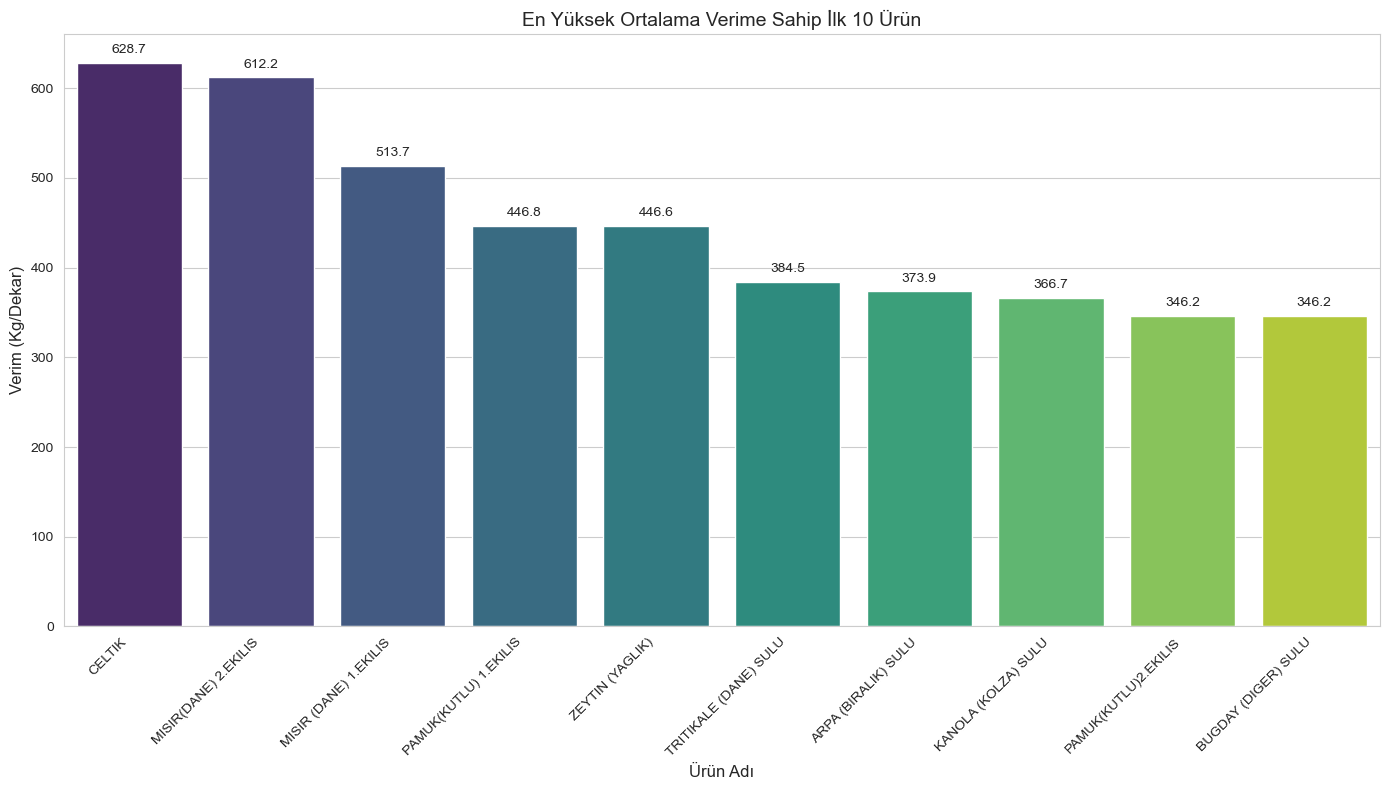


En Yüksek Ortalama Verime Sahip İlk 10 Ürün (Tablo):
| Urun Adi              |   Verim (Kg/Dekar) |
|:----------------------|-------------------:|
| CELTIK                |            628.657 |
| MISIR(DANE) 2.EKILIS  |            612.185 |
| MISIR (DANE) 1.EKILIS |            513.667 |
| PAMUK(KUTLU) 1.EKILIS |            446.839 |
| ZEYTIN (YAGLIK)       |            446.641 |
| TRITIKALE (DANE) SULU |            384.502 |
| ARPA (BIRALIK) SULU   |            373.946 |
| KANOLA (KOLZA) SULU   |            366.681 |
| PAMUK(KUTLU)2.EKILIS  |            346.231 |
| BUGDAY (DIGER) SULU   |            346.209 |


In [120]:
# Ürün adlarındaki yazım farklılıklarını düzelt ve hepsini büyük harfe çevir
df['Urun Adi'] = df['Urun Adi'].replace({
    'Bugday (Durum) kuru': 'Bugday (Durum) Kuru',
    'Bugday (Durum) sulu': 'Bugday (Durum) Sulu',
    'Bugday (Diger) sulu': 'Bugday (Diger) Sulu'
}).str.upper() # Tüm ürün isimlerini büyük harfe çevir

# Ürün türüne göre ortalama verimlilik hesaplama
avg_yield_per_product = df.groupby('Urun Adi')['Verim (Kg/Dekar)'].mean().reset_index()

# En verimli 10 ürünü seç
top_10_products = avg_yield_per_product.sort_values(by='Verim (Kg/Dekar)', ascending=False).head(10)

# Daha güzel bir grafik için seaborn kullanalım
plt.figure(figsize=(14, 8)) # Grafik boyutunu ayarladık
sns.set_style("whitegrid")
ax = sns.barplot(x='Urun Adi', y='Verim (Kg/Dekar)', data=top_10_products, palette="viridis") # Farklı bir palet kullandık
plt.ylabel('Verim (Kg/Dekar)', fontsize=12)
plt.xlabel('Ürün Adı', fontsize=12)
plt.title('En Yüksek Ortalama Verime Sahip İlk 10 Ürün', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Çubukların üzerine değerleri ekleyelim (formatı iyileştirdik)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",  # f-string ile daha temiz format
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points', fontsize=10)
plt.tight_layout()
plt.show()

# İsterseniz tablo olarak da gösterebilirsiniz
print("\nEn Yüksek Ortalama Verime Sahip İlk 10 Ürün (Tablo):")
print(top_10_products.to_markdown(index=False))

In [121]:
df.head()

,Il,Ilce,Urun Adi,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim
0,ADANA,SEYHAN,BUGDAY (DURUM) KURU,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0
1,ADANA,SEYHAN,BUGDAY (DURUM) SULU,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0
2,ADANA,SEYHAN,BUGDAY (DIGER) KURU,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0
3,ADANA,SEYHAN,BUGDAY (DIGER) SULU,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0
4,ADANA,YUREGIR,BUGDAY (DURUM) KURU,324.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0


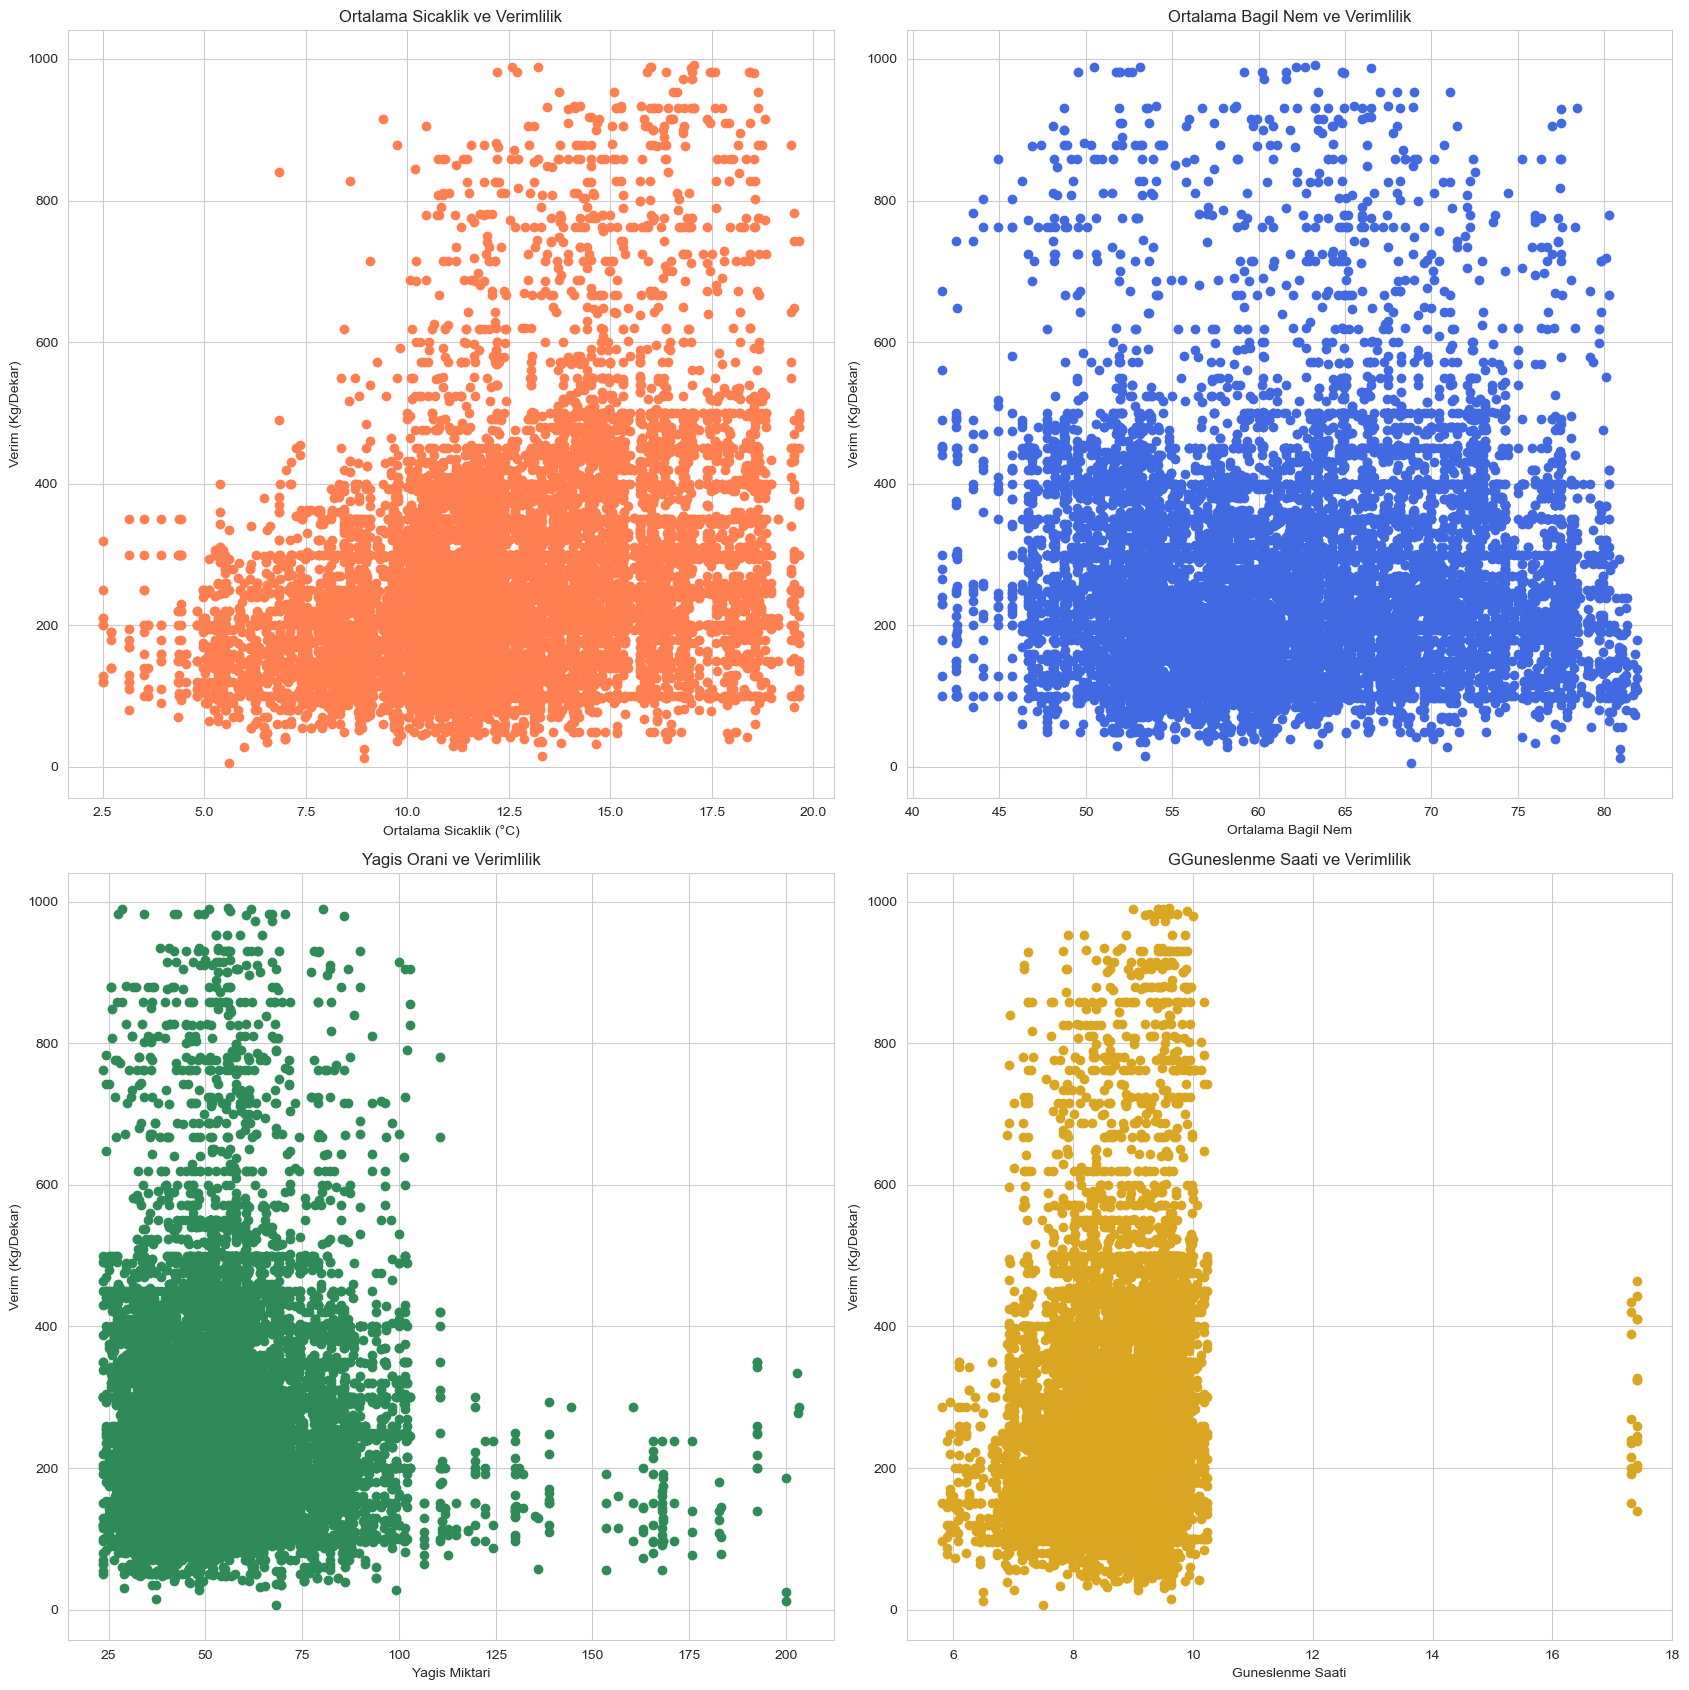

In [122]:
# Çevresel faktörler ve verimlilik arasındaki ilişkiyi görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(17, 17))

# Ortalama Sıcaklık (°C) ve Verimlilik
axes[0, 0].scatter(df['Ortalama Sicaklik'], df['Verim (Kg/Dekar)'], color='coral')
axes[0, 0].set_xlabel('Ortalama Sicaklik (°C)')
axes[0, 0].set_ylabel('Verim (Kg/Dekar)')
axes[0, 0].set_title('Ortalama Sicaklik ve Verimlilik')

# Nem Oranı (%) ve Verimlilik
axes[0, 1].scatter(df['Ortalama Bagil Nem'], df['Verim (Kg/Dekar)'], color='royalblue')
axes[0, 1].set_xlabel('Ortalama Bagil Nem')
axes[0, 1].set_ylabel('Verim (Kg/Dekar)')
axes[0, 1].set_title('Ortalama Bagil Nem ve Verimlilik')

# Yağış Oranı (mm) ve Verimlilik
axes[1, 0].scatter(df['Yagis Miktari'], df['Verim (Kg/Dekar)'], color='seagreen')
axes[1, 0].set_xlabel('Yagis Miktari')
axes[1, 0].set_ylabel('Verim (Kg/Dekar)')
axes[1, 0].set_title('Yagis Orani ve Verimlilik')

# Güneş Işığı (saat/gün) ve Verimlilik
axes[1, 1].scatter(df['Guneslenme Saati'], df['Verim (Kg/Dekar)'], color='goldenrod')
axes[1, 1].set_xlabel('Guneslenme Saati')
axes[1, 1].set_ylabel('Verim (Kg/Dekar)')
axes[1, 1].set_title('GGuneslenme Saati ve Verimlilik')

plt.tight_layout()
plt.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13045 entries, 0 to 13485
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Il                  13045 non-null  object 
 1   Ilce                13045 non-null  object 
 2   Urun Adi            13045 non-null  object 
 3   Verim (Kg/Dekar)    13045 non-null  float64
 4   Ortalama Sicaklik   13045 non-null  float64
 5   Maksimal Sicaklik   13045 non-null  float64
 6   Minimal Sicaklik    13045 non-null  float64
 7   Ortalama Bagil Nem  13045 non-null  float64
 8   Yagis Miktari       13045 non-null  float64
 9   Yagisli Gun Sayisi  13045 non-null  float64
 10  Guneslenme Saati    13045 non-null  float64
 11  Atmosfer Basinci    13045 non-null  float64
 12  Rakim               13045 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.4+ MB


In [124]:
df['urun_adi_num'] = df['Urun Adi'].astype('category').cat.codes
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6968\3243485489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['urun_adi_num'] = df['Urun Adi'].astype('category').cat.codes


,Il,Ilce,Urun Adi,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim,urun_adi_num
0,ADANA,SEYHAN,BUGDAY (DURUM) KURU,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,16
1,ADANA,SEYHAN,BUGDAY (DURUM) SULU,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,17
2,ADANA,SEYHAN,BUGDAY (DIGER) KURU,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,14
3,ADANA,SEYHAN,BUGDAY (DIGER) SULU,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,15
4,ADANA,YUREGIR,BUGDAY (DURUM) KURU,324.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,16


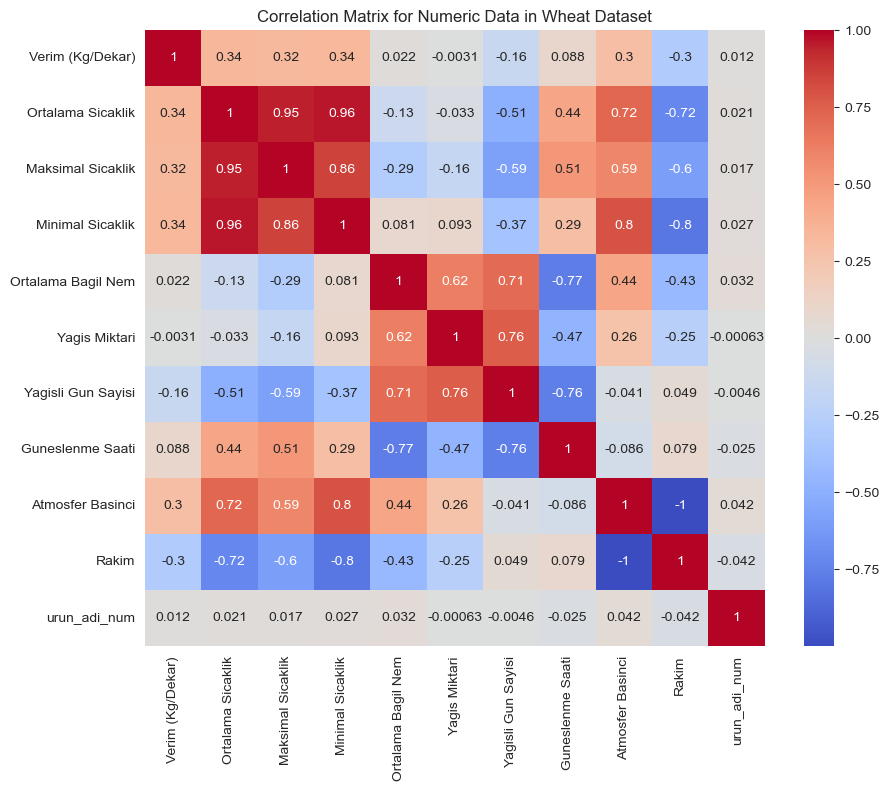

,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim,urun_adi_num
Verim (Kg/Dekar),1.000000,0.337958,0.321851,0.335370,0.021777,-0.003082,-0.155278,0.088038,0.296506,-0.296417,0.012346
Ortalama Sicaklik,0.337958,1.000000,0.951958,0.964666,-0.125870,-0.033445,-0.506443,0.440838,0.719933,-0.724118,0.020919
Maksimal Sicaklik,0.321851,0.951958,1.000000,0.855971,-0.286719,-0.163821,-0.591265,0.511817,0.589663,-0.596813,0.016733
Minimal Sicaklik,0.335370,0.964666,0.855971,1.000000,0.080903,0.093175,-0.365395,0.293441,0.799516,-0.800593,0.026883
Ortalama Bagil Nem,0.021777,-0.125870,-0.286719,0.080903,1.000000,0.624016,0.710392,-0.766733,0.443488,-0.431537,0.032494
Yagis Miktari,-0.003082,-0.033445,-0.163821,0.093175,0.624016,1.000000,0.763700,-0.469727,0.261094,-0.252275,-0.000635
Yagisli Gun Sayisi,-0.155278,-0.506443,-0.591265,-0.365395,0.710392,0.763700,1.000000,-0.763521,-0.040775,0.048948,-0.004587
Guneslenme Saati,0.088038,0.440838,0.511817,0.293441,-0.766733,-0.469727,-0.763521,1.000000,-0.085588,0.079012,-0.024508
Atmosfer Basinci,0.296506,0.719933,0.589663,0.799516,0.443488,0.261094,-0.040775,-0.085588,1.000000,-0.999474,0.041625
Rakim,-0.296417,-0.724118,-0.596813,-0.800593,-0.431537,-0.252275,0.048948,0.079012,-0.999474,1.000000,-0.042396


In [125]:
# Remove non-numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns only
correlation_matrix_numeric = numeric_data.corr()

# Plot the heatmap for the numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Data in Wheat Dataset')
plt.show()
correlation_matrix_numeric

In [126]:
df.head()

,Il,Ilce,Urun Adi,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim,urun_adi_num
0,ADANA,SEYHAN,BUGDAY (DURUM) KURU,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,16
1,ADANA,SEYHAN,BUGDAY (DURUM) SULU,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,17
2,ADANA,SEYHAN,BUGDAY (DIGER) KURU,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,14
3,ADANA,SEYHAN,BUGDAY (DIGER) SULU,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,15
4,ADANA,YUREGIR,BUGDAY (DURUM) KURU,324.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,16


In [127]:
df2 = df.drop(columns=['Il', 'Ilce','Urun Adi'])

In [128]:
df2.head()

,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim,urun_adi_num
0,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,16
1,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,17
2,300.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,14
3,500.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,15
4,324.0,18.44,24.18,13.37,64.83,60.5,4.92,9.21,100.992,27.0,16


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Hedef değişkeni ve bağımsız değişkenleri belirleyelim
X = df2.drop(columns=['Verim (Kg/Dekar)'])
y = df2['Verim (Kg/Dekar)']

# Veri setini eğitim ve test seti olarak bölelim (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setinin boyutlarını kontrol edelim
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((10436, 10), (2609, 10), (10436,), (2609,))

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
# Normalleştirme/Standartlaştırma için sayısal sütunları seçelim
numeric_columns = [
    'Verim (Kg/Dekar)','Ortalama Sicaklik', 'Maksimal Sicaklik', 'Minimal Sicaklik',
    'Ortalama Bagil Nem', 'Yagis Miktari', 'Yagisli Gun Sayisi', 'Guneslenme Saati',
    'Atmosfer Basinci', 'Rakim', 'urun_adi_num'
]

# Standartlaştırma işlemi
scaler = StandardScaler()
df2[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# İlk birkaç satırı görüntüleyelim
df2.head()

,Verim (Kg/Dekar),Ortalama Sicaklik,Maksimal Sicaklik,Minimal Sicaklik,Ortalama Bagil Nem,Yagis Miktari,Yagisli Gun Sayisi,Guneslenme Saati,Atmosfer Basinci,Rakim,urun_adi_num
0,0.240238,1.921771,2.041585,1.82651,0.37097,0.254718,-0.713465,0.505171,1.407487,-1.376493,-0.270244
1,1.584161,1.921771,2.041585,1.82651,0.37097,0.254718,-0.713465,0.505171,1.407487,-1.376493,-0.183269
2,0.240238,1.921771,2.041585,1.82651,0.37097,0.254718,-0.713465,0.505171,1.407487,-1.376493,-0.444192
3,1.584161,1.921771,2.041585,1.82651,0.37097,0.254718,-0.713465,0.505171,1.407487,-1.376493,-0.357218
4,0.401509,1.921771,2.041585,1.82651,0.37097,0.254718,-0.713465,0.505171,1.407487,-1.376493,-0.270244


In [132]:
from sklearn.ensemble import RandomForestRegressor

# Modeli oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_rf_pred = rf_model.predict(X_test)

# Model performansını değerlendirme
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print('mse',mse_rf)
print('r2',r2_rf)

mse 4585.952935816137
r2 0.7739728084435696


In [133]:
from sklearn.svm import SVR

# Support Vector Regressor modelini oluşturma ve eğitme
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_svr_pred = svr_model.predict(X_test)

# Model performansını değerlendirme
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)

print('mse',mse_svr)
print('r2',r2_svr)

mse 19567.01804986695
r2 0.035603243460166856


In [134]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modelini oluşturma ve eğitme
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_gbr_pred = gbr_model.predict(X_test)

# Model performansını değerlendirme
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
r2_gbr = r2_score(y_test, y_gbr_pred)

print('mse',mse_gbr)
print('r2',r2_gbr)

mse 6754.132085017649
r2 0.6671100798582372


In [135]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regressor modelini oluşturma ve eğitme
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_knn_pred = knn_model.predict(X_test)

# Model performansını değerlendirme
mse_knn = mean_squared_error(y_test, y_knn_pred)
r2_knn = r2_score(y_test, y_knn_pred)

print('mse',mse_knn)
print('r2',r2_knn)

mse 19827.518068225374
r2 0.022764017158888983


In [136]:
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor modelini oluşturma ve eğitme
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_ada_pred = ada_model.predict(X_test)

# Model performansını değerlendirme
mse_ada = mean_squared_error(y_test, y_ada_pred)
r2_ada = r2_score(y_test, y_ada_pred)

print('mse',mse_ada)
print('r2',r2_ada)

mse 12814.875988249421
r2 0.36839508160969037


In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor


# Hiperparametre deneme aralığı
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [4, 6, 8]
}

# GridSearchCV ile CatBoost için hiperparametre optimizasyonu
cat_model = CatBoostRegressor(random_seed=42, verbose=0)
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi parametreler ve model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("En iyi parametreler:", best_params)

# Test verileri üzerinde tahmin yapma
y_pred = best_model.predict(X_test)

# Model performansını değerlendirme
mse_cat = mean_squared_error(y_test, y_pred)
r2_cat = r2_score(y_test, y_pred)

print('MSE:', mse_cat)
print('R2:', r2_cat)

En iyi parametreler: {'depth': 8, 'iterations': 1500, 'learning_rate': 0.05}
MSE: 4452.815822008478
R2: 0.7805347178977317


In [197]:
# Performans metriklerini yazdırma
print('RandomForestRegressor MSE:', mse_rf, 'RandomForestRegressor R2:', r2_rf)
print('SVR MSE:', mse_svr, 'SVR R2:', r2_svr)
print('GradientBoostingRegressor MSE:', mse_gbr, 'GradientBoostingRegressor R2:', r2_gbr)
print('KNN MSE:', mse_knn, 'KNN R2:', r2_knn)
print('AdaBoostRegressor MSE:', mse_ada, 'AdaBoostRegressor R2:', r2_ada)
print('CatBoostRegressor MSE:', mse_cat, 'CatBoostRegressor R2:', r2_cat)

RandomForestRegressor MSE: 4585.952935816137 RandomForestRegressor R2: 0.7739728084435696
SVR MSE: 19567.01804986695 SVR R2: 0.035603243460166856
GradientBoostingRegressor MSE: 6754.132085017649 GradientBoostingRegressor R2: 0.6671100798582372
KNN MSE: 19827.518068225374 KNN R2: 0.022764017158888983
AdaBoostRegressor MSE: 12814.875988249421 AdaBoostRegressor R2: 0.36839508160969037
CatBoostRegressor MSE: 4452.815822008478 CatBoostRegressor R2: 0.7805347178977317


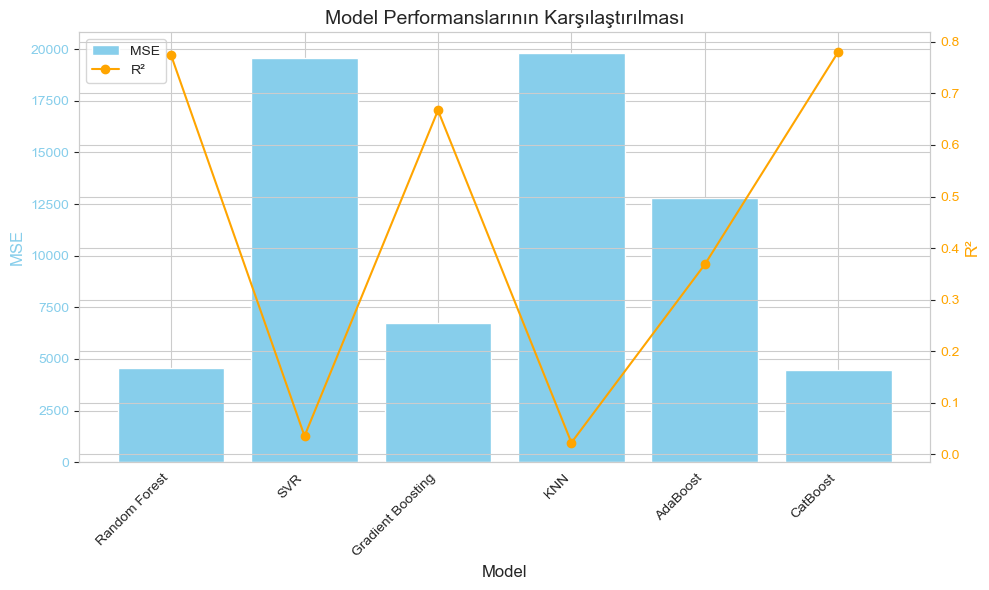

In [199]:
# Model performans verileri
models = ['Random Forest', 'SVR', 'Gradient Boosting', 'KNN', 'AdaBoost','CatBoost']
mse_scores = [mse_rf, mse_svr, mse_gbr, mse_knn, mse_ada, mse_cat]  # Güncellenmiş MSE değerleri
r2_scores = [r2_rf, r2_svr, r2_gbr, r2_knn, r2_ada, r2_cat]  # Güncellenmiş R2 değerleri

# Veri setini oluşturma
df_metrics = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2': r2_scores
})

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için çubuk grafiği (sol eksen)
ax1.bar(df_metrics['Model'], df_metrics['MSE'], color='skyblue', label='MSE')
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('MSE', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')

# x ekseni etiketlerini döndürme ve hizalama (DÜZELTİLDİ)
plt.xticks(df_metrics['Model'], rotation=45, ha='right') # plt.xticks kullanıldı

# İkinci y ekseni oluşturma (sağ eksen)
ax2 = ax1.twinx()
ax2.plot(df_metrics['Model'], df_metrics['R2'], color='orange', marker='o', label='R²')
ax2.set_ylabel('R²', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve lejant ekleme
plt.title('Model Performanslarının Karşılaştırılması', fontsize=14)

# Lejantları birleştirme
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()


In [139]:
from sklearn.model_selection import GridSearchCV

# Gradient Boosting Regressor için hiperparametre ızgarasını tanımlayın
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# GridSearchCV ile Gradient Boosting Regressor modelini optimize edin
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Modeli eğitin
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri gösterin
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi model ile tahminler yapın
best_gbr_model = grid_search.best_estimator_
y_pred_best_gbr = best_gbr_model.predict(X_test)

# Model performansını değerlendirin
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print('Gradient Boosting En İyi Model Mean Squared Error:', mse_best_gbr)
print('Gradient Boosting En İyi Model R-squared:', r2_best_gbr)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi hiperparametreler: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Gradient Boosting En İyi Model Mean Squared Error: 3936.44036734439
Gradient Boosting En İyi Model R-squared: 0.8059852394010945


In [140]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor için hiperparametre ızgarasını tanımlayın
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV ile Random Forest Regressor modelini optimize edin
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Modeli eğitin
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri gösterin
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi model ile tahminler yapın
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Model performansını değerlendirin
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print('Random Forest En İyi Model Mean Squared Error:', mse_best_rf)
print('Random Forest En İyi Model R-squared:', r2_best_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi hiperparametreler: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest En İyi Model Mean Squared Error: 9965.234550006577
Random Forest En İyi Model R-squared: 0.5088449423569488


In [220]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Veriyi yükleme
df = pd.read_csv("BirlesmisVeri.csv")

# Hedef değişkeni sayısal türe dönüştürme ve eksik değerleri doldurma
df['Verim (Kg/Dekar)'] = pd.to_numeric(df['Verim (Kg/Dekar)'], errors='coerce')
df = df.dropna(subset=['Verim (Kg/Dekar)'])

# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(['Verim (Kg/Dekar)', 'Il', 'Ilce'], axis=1)
y = df['Verim (Kg/Dekar)']

# Kolon dönüşümleri
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Urun Adi']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# Veriyi dönüştürme
X_processed = preprocessor.fit_transform(X)

# Veri kümesi boyutlarını kontrol etme
print(f"X işlenmiş boyut: {X_processed.shape}")
print(f"Y boyut: {y.shape}")

# Veriyi eğitim, doğrulama ve test kümelerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# MLP modeli oluşturma
model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regresyon için 1 nöron
])


# Modeli derleme
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape'])



X işlenmiş boyut: (13045, 61)
Y boyut: (13045,)


In [221]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Tahmin yapma
y_train_pred = model.predict(X_train).flatten()
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

# Performans metriklerini hesaplama
metrics = {
    'train': {
        'mse': mean_squared_error(y_train, y_train_pred),
        'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'mae': mean_absolute_error(y_train, y_train_pred),
        'r2': r2_score(y_train, y_train_pred)
    },
    'val': {
        'mse': mean_squared_error(y_val, y_val_pred),
        'rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'mae': mean_absolute_error(y_val, y_val_pred),
        'r2': r2_score(y_val, y_val_pred)
    },
    'test': {
        'mse': mean_squared_error(y_test, y_test_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'mae': mean_absolute_error(y_test, y_test_pred),
        'r2': r2_score(y_test, y_test_pred)
    }
}

print(f"Train Metrics: {metrics['train']}")
print(f"Validation Metrics: {metrics['val']}")
print(f"Test Metrics: {metrics['test']}")


Epoch 1/200
245/245 [==============================] - 2s 6ms/step - loss: 72702.7344 - mae: 229.4597 - mse: 72702.7344 - mape: 86.1587 - val_loss: 45110.7109 - val_mae: 176.7324 - val_mse: 45110.7109 - val_mape: 65.1703
Epoch 2/200
245/245 [==============================] - 1s 5ms/step - loss: 17509.5918 - mae: 99.3740 - mse: 17509.5918 - mape: 41.5491 - val_loss: 10172.0254 - val_mae: 72.3814 - val_mse: 10172.0254 - val_mape: 32.3442
Epoch 3/200
245/245 [==============================] - 1s 5ms/step - loss: 10925.4053 - mae: 75.9861 - mse: 10925.4053 - mape: 34.5224 - val_loss: 7140.8442 - val_mae: 58.2029 - val_mse: 7140.8442 - val_mape: 26.6489
Epoch 4/200
245/245 [==============================] - 1s 5ms/step - loss: 9743.8994 - mae: 71.1435 - mse: 9743.8994 - mape: 32.1905 - val_loss: 6826.9834 - val_mae: 57.3778 - val_mse: 6826.9834 - val_mape: 26.8609
Epoch 5/200
245/245 [==============================] - 1s 5ms/step - loss: 9119.1406 - mae: 68.7130 - mse: 9119.1406 - mape: 31.

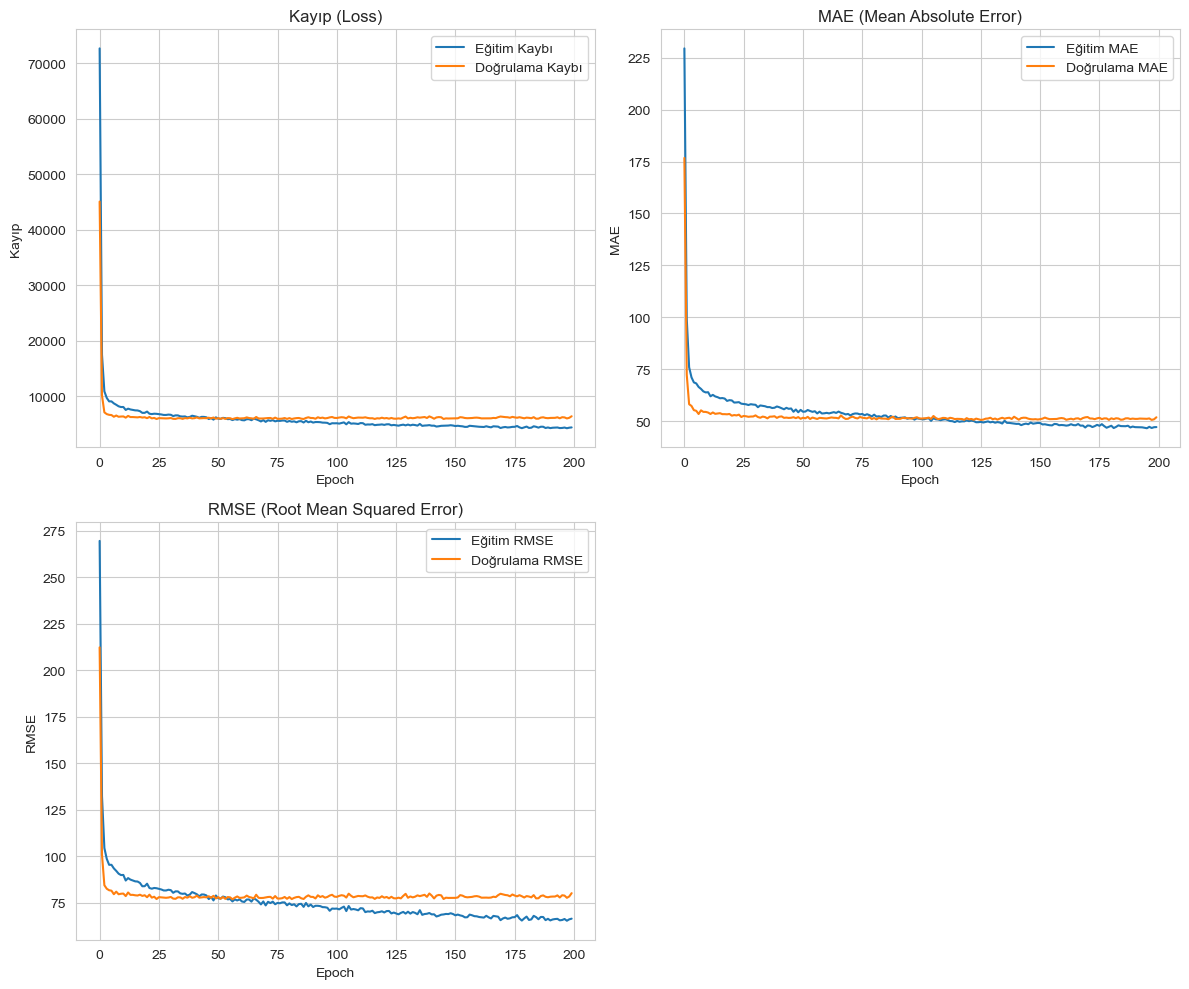

In [227]:
# Eğitim geçmişini görselleştirme
plt.figure(figsize=(12, 10))

# Kayıp görselleştirme (Loss)
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# MAE görselleştirme
plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Eğitim MAE')
plt.plot(history.history['val_mae'], label='Doğrulama MAE')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# RMSE görselleştirme
plt.subplot(2, 2, 3)
plt.plot(np.sqrt(history.history['loss']), label='Eğitim RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Doğrulama RMSE')
plt.title('RMSE (Root Mean Squared Error)')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()


plt.tight_layout()
plt.show()

In [242]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Veriyi yükleme
df = pd.read_csv("BirlesmisVeri.csv")

# Hedef değişkeni sayısal türe dönüştürme ve eksik değerleri doldurma
df['Verim (Kg/Dekar)'] = pd.to_numeric(df['Verim (Kg/Dekar)'], errors='coerce')
df = df.dropna(subset=['Verim (Kg/Dekar)'])

# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(['Verim (Kg/Dekar)', 'Il', 'Ilce'], axis=1)
y = df['Verim (Kg/Dekar)']

# Kolon dönüşümleri
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Urun Adi']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# Veriyi dönüştürme
X_processed = preprocessor.fit_transform(X)

# Veri kümesi boyutlarını kontrol etme
print(f"X işlenmiş boyut: {X_processed.shape}")
print(f"Y boyut: {y.shape}")

# Veriyi eğitim, doğrulama ve test kümelerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf

def create_model(noron_sayisi=128, dropout_orani=0.3, ogrenme_orani=0.001):
    model = Sequential([
        layers.Dense(noron_sayisi, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(dropout_orani),
        layers.Dense(noron_sayisi//2, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_orani),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=ogrenme_orani)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {
    'noron_sayisi': [64, 128],
    'dropout_orani': [0.2, 0.3],
    'ogrenme_orani': [0.001, 0.0001],
    'batch_size': [32, 64],
    'epochs': [50,100]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1) # n_jobs=-1 tüm işlemcileri kullanır
grid_result = grid.fit(X_train, y_train)

print("En iyi: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

X işlenmiş boyut: (13045, 61)
Y boyut: (13045,)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6968\2387584417.py:63: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


En iyi: -6084.037563 using {'batch_size': 64, 'dropout_orani': 0.3, 'epochs': 100, 'noron_sayisi': 128, 'ogrenme_orani': 0.001}


In [243]:
# Extract the best hyperparameters from the GridSearchCV results
best_params = grid_result.best_params_

# Unpack the hyperparameters
noron_sayisi = best_params['noron_sayisi']
dropout_orani = best_params['dropout_orani']
ogrenme_orani = best_params['ogrenme_orani']
batch_size = best_params['batch_size']
epochs = best_params['epochs']

# Define the model architecture based on the best parameters
model = Sequential([
    layers.Dense(noron_sayisi, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_orani),
    layers.Dense(noron_sayisi // 2, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(dropout_orani),
    layers.Dense(1)
])

# Compile the model with the Adam optimizer, mse loss, and desired metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=ogrenme_orani)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse', 'mape'])

# Train the model with the best hyperparameters and your training data
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model's performance on the test set
y_test_pred = model.predict(X_test).flatten()
metrics = {
    'test': {
        'mse': mean_squared_error(y_test, y_test_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'mae': mean_absolute_error(y_test, y_test_pred),
        'r2': r2_score(y_test, y_test_pred)
    }
}
print(f"Test Metrics: {metrics['test']}")

Epoch 1/100
123/123 [==============================] - 1s 6ms/step - loss: 90909.2344 - mae: 263.9281 - mse: 90909.2344 - mape: 100.5803 - val_loss: 92138.2812 - val_mae: 264.3167 - val_mse: 92138.2812 - val_mape: 99.8289
Epoch 2/100
123/123 [==============================] - 1s 5ms/step - loss: 85375.7500 - mae: 259.7331 - mse: 85375.7500 - mape: 101.4357 - val_loss: 88746.5938 - val_mae: 262.9509 - val_mse: 88746.5938 - val_mape: 101.3707
Epoch 3/100
123/123 [==============================] - 1s 5ms/step - loss: 77822.4297 - mae: 251.3870 - mse: 77822.4297 - mape: 100.4950 - val_loss: 80569.4062 - val_mae: 254.6907 - val_mse: 80569.4062 - val_mape: 100.9665
Epoch 4/100
123/123 [==============================] - 1s 5ms/step - loss: 69223.6172 - mae: 239.6388 - mse: 69223.6172 - mape: 98.1079 - val_loss: 69641.4453 - val_mae: 240.4524 - val_mse: 69641.4453 - val_mape: 98.3500
Epoch 5/100
123/123 [==============================] - 1s 5ms/step - loss: 60006.1836 - mae: 224.9519 - mse: 60

82/82 [==============================] - 0s 2ms/step


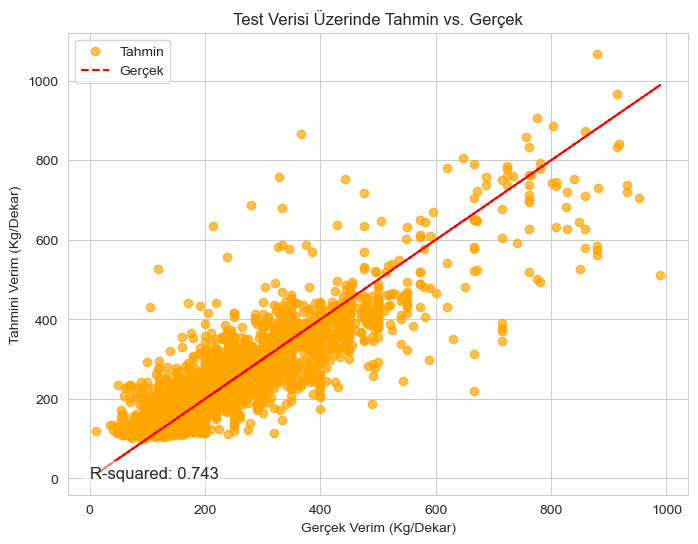

In [29]:
import matplotlib.pyplot as plt

# Test tahminlerini ve gerçek değerleri oluşturun
y_test_pred = model.predict(X_test).flatten()

# Saçılım grafiği oluşturun
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label='Tahmin')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Gerçek')
plt.xlabel('Gerçek Verim (Kg/Dekar)')
plt.ylabel('Tahmini Verim (Kg/Dekar)')
plt.title('Test Verisi Üzerinde Tahmin vs. Gerçek')
plt.legend()
plt.grid(True)

# R-squared değerini ekrana yazdırın
r2 = r2_score(y_test, y_test_pred)
plt.text(0.7, 0.8, f"R-squared: {r2:.3f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Grafiği gösterin
plt.show()

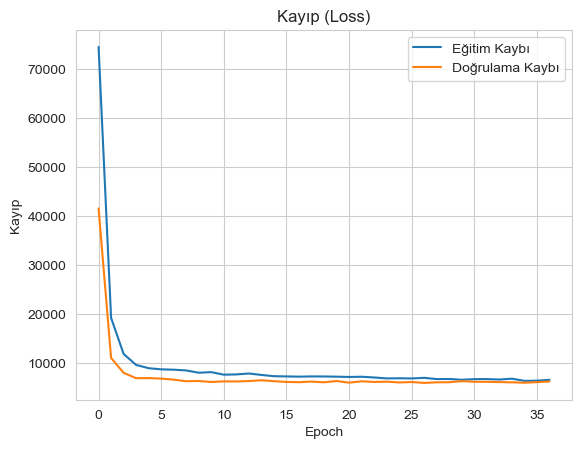

In [23]:
# Kayıp görselleştirme (Loss)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

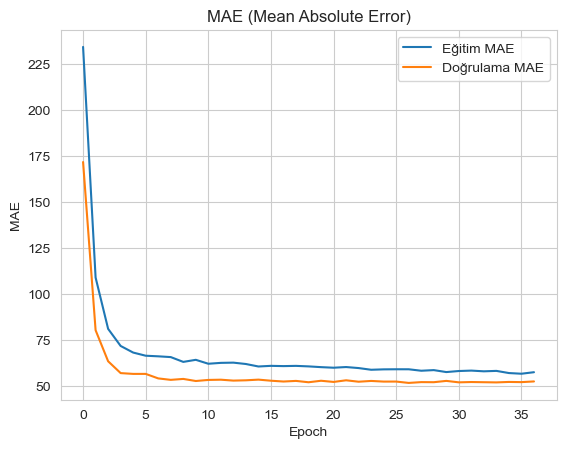

In [25]:
# MAE görselleştirme
plt.plot(history.history['mae'], label='Eğitim MAE')
plt.plot(history.history['val_mae'], label='Doğrulama MAE')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

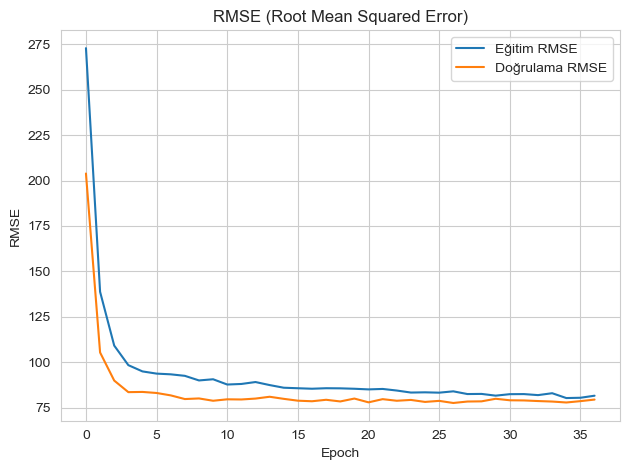

In [27]:
# RMSE görselleştirme
plt.plot(np.sqrt(history.history['loss']), label='Eğitim RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Doğrulama RMSE')
plt.title('RMSE (Root Mean Squared Error)')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()


plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # Modeli kaydetmek ve yüklemek için

# Veriyi yükleme
df = pd.read_csv("BirlesmisVeri.csv")

# Hedef değişkeni sayısal türe dönüştürme ve eksik değerleri doldurma
df['Verim (Kg/Dekar)'] = pd.to_numeric(df['Verim (Kg/Dekar)'], errors='coerce')
df = df.dropna(subset=['Verim (Kg/Dekar)'])

# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(['Verim (Kg/Dekar)', 'Il', 'Ilce'], axis=1)
y = df['Verim (Kg/Dekar)']

# Kolon dönüşümleri
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Urun Adi']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# Veriyi dönüştürme
X_processed = preprocessor.fit_transform(X)

# Veri kümesi boyutlarını kontrol etme
print(f"X işlenmiş boyut: {X_processed.shape}")
print(f"Y boyut: {y.shape}")

def rastgele_gurultu_ekle(X, gurultu_faktor=0.05):
    """Verilere rastgele gürültü ekler."""
    gurultu = np.random.normal(loc=0.0, scale=gurultu_faktor*np.std(X, axis=0), size=X.shape)
    return X + gurultu

# Veriyi eğitim, doğrulama ve test kümelerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Veri artırma (sadece eğitim verisine uygulanır!)
X_train_artirilmis = rastgele_gurultu_ekle(X_train)


# MLP modeli oluşturma
model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regresyon için 1 nöron
])


# Modeli derleme
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape'])

# Erken durdurma ekleme
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli artırılmış veriyle eğitme (ve erken durdurma ile)
history = model.fit(X_train_artirilmis, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])
# Modeli ve preprocessor'u kaydetme
model.save("verim_tahmin_modeli.h5")
joblib.dump(preprocessor, 'preprocessor.joblib')

# Tahmin yapma
y_train_pred = model.predict(X_train).flatten()
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

# Performans metriklerini hesaplama
metrics = {
    'train': {
        'mse': mean_squared_error(y_train, y_train_pred),
        'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'mae': mean_absolute_error(y_train, y_train_pred),
        'r2': r2_score(y_train, y_train_pred)
    },
    'val': {
        'mse': mean_squared_error(y_val, y_val_pred),
        'rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'mae': mean_absolute_error(y_val, y_val_pred),
        'r2': r2_score(y_val, y_val_pred)
    },
    'test': {
        'mse': mean_squared_error(y_test, y_test_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'mae': mean_absolute_error(y_test, y_test_pred),
        'r2': r2_score(y_test, y_test_pred)
    }
}

print(f"Train Metrics: {metrics['train']}")
print(f"Validation Metrics: {metrics['val']}")
print(f"Test Metrics: {metrics['test']}")



X işlenmiş boyut: (13045, 61)
Y boyut: (13045,)
Epoch 1/200
245/245 [==============================] - 2s 6ms/step - loss: 72314.9141 - mae: 229.0015 - mse: 72314.9141 - mape: 86.1638 - val_loss: 39489.2734 - val_mae: 162.4451 - val_mse: 39489.2734 - val_mape: 62.3910
Epoch 2/200
245/245 [==============================] - 1s 5ms/step - loss: 17071.1367 - mae: 99.3959 - mse: 17071.1367 - mape: 42.6582 - val_loss: 10224.6650 - val_mae: 72.4723 - val_mse: 10224.6650 - val_mape: 32.2713
Epoch 3/200
245/245 [==============================] - 1s 5ms/step - loss: 11394.3711 - mae: 78.8475 - mse: 11394.3711 - mape: 35.9470 - val_loss: 8011.7983 - val_mae: 62.7839 - val_mse: 8011.7983 - val_mape: 29.3894
Epoch 4/200
245/245 [==============================] - 1s 5ms/step - loss: 9911.1084 - mae: 72.0920 - mse: 9911.1084 - mape: 32.2661 - val_loss: 7035.4917 - val_mae: 56.7026 - val_mse: 7035.4917 - val_mape: 25.8630
Epoch 5/200
245/245 [==============================] - 1s 5ms/step - loss: 9214.

82/82 [==============================] - 0s 2ms/step


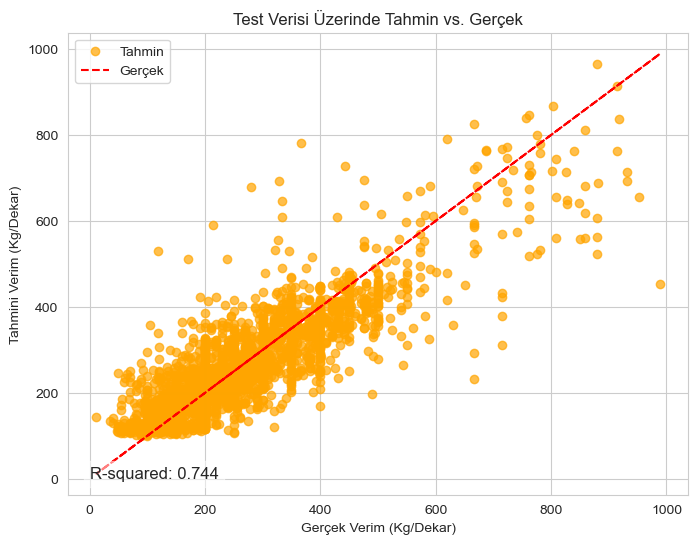

In [33]:
import matplotlib.pyplot as plt

# Test tahminlerini ve gerçek değerleri oluşturun
y_test_pred = model.predict(X_test).flatten()

# Saçılım grafiği oluşturun
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label='Tahmin')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Gerçek')
plt.xlabel('Gerçek Verim (Kg/Dekar)')
plt.ylabel('Tahmini Verim (Kg/Dekar)')
plt.title('Test Verisi Üzerinde Tahmin vs. Gerçek')
plt.legend()
plt.grid(True)

# R-squared değerini ekrana yazdırın
r2 = r2_score(y_test, y_test_pred)
plt.text(0.7, 0.8, f"R-squared: {r2:.3f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Grafiği gösterin
plt.show()

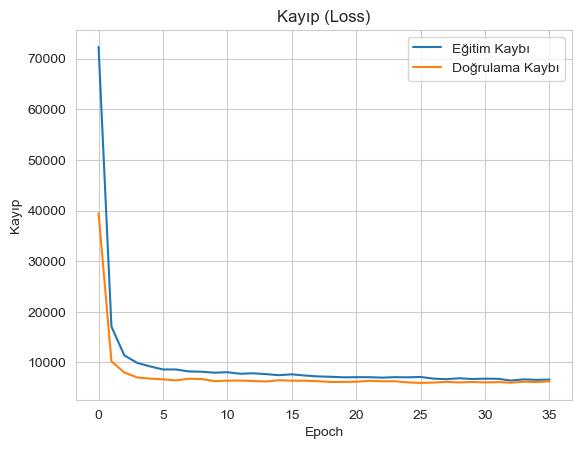

In [34]:
# Kayıp görselleştirme (Loss)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

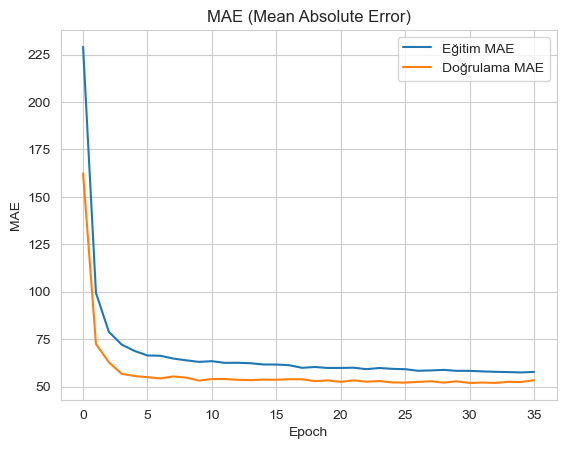

In [35]:
# MAE görselleştirme
plt.plot(history.history['mae'], label='Eğitim MAE')
plt.plot(history.history['val_mae'], label='Doğrulama MAE')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

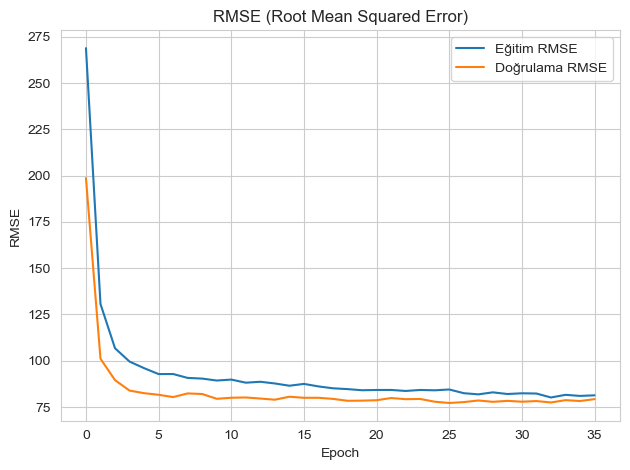

In [36]:
# RMSE görselleştirme
plt.plot(np.sqrt(history.history['loss']), label='Eğitim RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Doğrulama RMSE')
plt.title('RMSE (Root Mean Squared Error)')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()


plt.tight_layout()
plt.show()

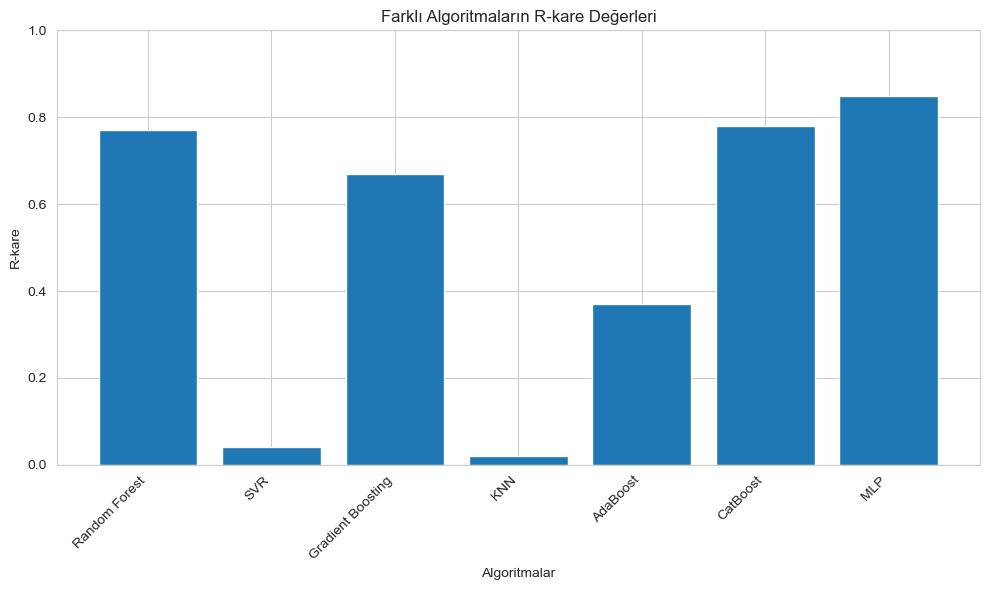

In [4]:
import matplotlib.pyplot as plt

algoritmalar = ['Random Forest', 'SVR', 'Gradient Boosting', 'KNN', 'AdaBoost', 'CatBoost', 'MLP']
r_kareler = [0.77, 0.04, 0.67, 0.02, 0.37, 0.78, 0.85]

plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlayın
plt.bar(algoritmalar, r_kareler)
plt.xlabel("Algoritmalar")
plt.ylabel("R-kare")
plt.title("Farklı Algoritmaların R-kare Değerleri")
plt.ylim(0, 1) # R-kare değerinin 0 ile 1 arasında olduğunu belirtmek için
plt.xticks(rotation=45, ha='right') # x ekseni etiketlerini döndürün
plt.tight_layout() # Etiketlerin kesilmesini önleyin
plt.show()

In [1]:
import joblib
import pandas as pd

In [2]:
# Kaydedilen modeli ve preprocessor'u yükleme
from tensorflow.keras.models import load_model
yuklenen_model = load_model("verim_tahmin_modeli.h5")
yuklenen_preprocessor = joblib.load('preprocessor.joblib')

# Veriyi yükleme
df = pd.read_csv("BirlesmisVeri.csv")

# Öneri sistemi fonksiyonunu geliştirme 
def make_recommendations_all_products(input_data, model, preprocessor): 
    # Tüm ürün adlarını al
    all_products = df['Urun Adi'].unique()
    # Giriş verisini tüm ürünler için tekrarla
    input_data_repeated = pd.concat([input_data] * len(all_products), ignore_index=True)
    input_data_repeated['Urun Adi'] = all_products

    # Veriyi işle ve tahminleri yap
    input_processed = preprocessor.transform(input_data_repeated)
    predictions = model.predict(input_processed).flatten()
    
    # Yeni bir DataFrame oluştur ve tahminleri ekle
    recommendations_df = pd.DataFrame({'Urun Adi': all_products, 'Tahmini Verim': predictions})

    return recommendations_df.nlargest(5, 'Tahmini Verim')

def get_recommendations_from_user(model, preprocessor):
        ortalama_sicaklik = float(input("Ortalama Sıcaklık: "))
        maksimal_sicaklik = float(input("Maksimal Sıcaklık: "))
        minimal_sicaklik = float(input("Minimal Sıcaklık: "))
        ortalama_bagil_nem = float(input("Ortalama Bağıl Nem: "))
        yagis_miktari = float(input("Yağış Miktarı: "))
        yagisli_gun_sayisi = float(input("Yağışlı Gün Sayısı: "))
        guneslenme_saati = float(input("Güneşlenme Saati: "))
        atmosfer_basinci = float(input("Atmosfer Basıncı: "))
        rakim = float(input("Rakım: "))

        input_data = pd.DataFrame({
            'Ortalama Sicaklik': [ortalama_sicaklik],
            'Maksimal Sicaklik': [maksimal_sicaklik],
            'Minimal Sicaklik': [minimal_sicaklik],
            'Ortalama Bagil Nem': [ortalama_bagil_nem],
            'Yagis Miktari': [yagis_miktari],
            'Yagisli Gun Sayisi': [yagisli_gun_sayisi],
            'Guneslenme Saati': [guneslenme_saati],
            'Atmosfer Basinci': [atmosfer_basinci],
            'Rakim': [rakim]
        })

        oneriler = make_recommendations_all_products(input_data, model, preprocessor)
        print("\nEn Yüksek Verimli 5 Ürün:")
        print(oneriler)
# 14-18-8-53-51-6-9-88-1078

In [5]:
get_recommendations_from_user(yuklenen_model, yuklenen_preprocessor)


2/2 [==============================] - 0s 2ms/step

En Yüksek Verimli 5 Ürün:
                 Urun Adi  Tahmini Verim
14   Misir(Dane) 2.ekilis     639.090637
13  Misir (Dane) 1.ekilis     612.499268
15                 Celtik     558.351501
6     Bugday (Diger) sulu     406.647552
44  Pamuk(Kutlu) 1.ekilis     398.975464
